# Setup

In [1]:
import sys
from pathlib import Path
# get current working directory
cwd = %pwd
# add shared_code directory to Python sys.path
sys.path.append(str(Path(cwd).parent / "shared_code"))
# import all libraries in shared_code directory 'imports.py' file
from imports import *
%matplotlib inline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Random Walks (static changes)

In [46]:
# Set a random seed for reproducibility
np.random.seed(42)

# Parameters
n_walks = 20  # Number of random walks
n_steps = 300  # Number of steps per walk
start_bankroll = 10000  # Starting amount of each bankroll
std_dev = 100  # Standard deviation of the step change

# Initialize an array to store the bankroll values for each walk
walks = np.zeros((n_walks, n_steps))

# Set the starting point for each walk
walks[:, 0] = start_bankroll

# Simulate each step for each random walk
for i in range(1, n_steps):
    changes = np.random.normal(0, std_dev, size=n_walks)
    walks[:, i] = walks[:, i - 1] + changes

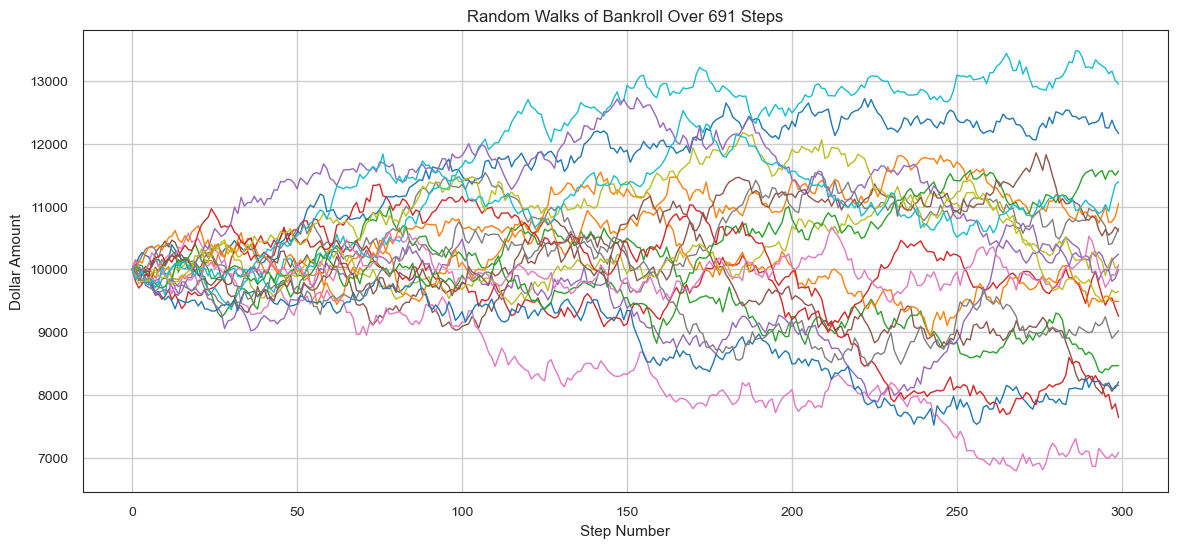

In [47]:
# Plotting the random walks
plt.figure(figsize=(14, 6))  # Set the figure size for better readability
for i in range(n_walks):
    plt.plot(range(n_steps), walks[i, :], linewidth=1)  # Plot each walk with a thin line

plt.title('Random Walks of Bankroll Over 691 Steps')
plt.xlabel('Step Number')
plt.ylabel('Dollar Amount')
plt.grid(True)
plt.show()

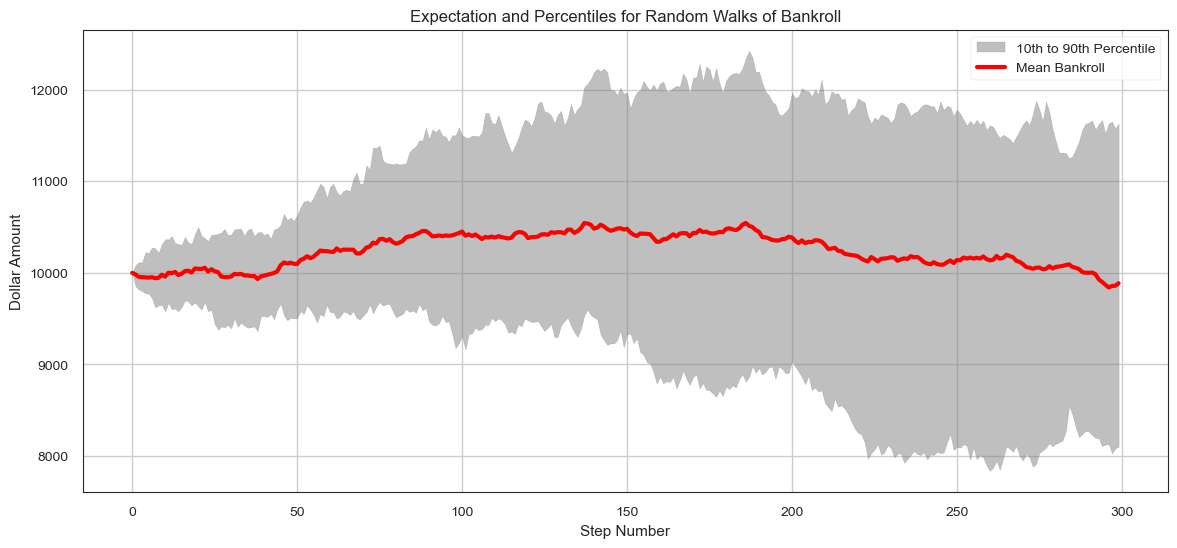

In [48]:
# Calculate mean, 10th percentile, and 90th percentile
mean_walks = np.mean(walks, axis=0)
percentile10 = np.percentile(walks, 10, axis=0)
percentile90 = np.percentile(walks, 90, axis=0)

# Plotting the mean and percentile range as a filled area
plt.figure(figsize=(14, 6))
plt.fill_between(range(n_steps), percentile10, percentile90, color='gray', alpha=0.5, label='10th to 90th Percentile')
plt.plot(mean_walks, label='Mean Bankroll', color='red', linewidth=3)

plt.title('Expectation and Percentiles for Random Walks of Bankroll')
plt.xlabel('Step Number')
plt.ylabel('Dollar Amount')
plt.legend()
plt.grid(True)
plt.show()

# Random Walks (dynamic changes)

In [49]:
# Set a random seed for reproducibility
np.random.seed(42)

# Parameters
n_walks = 20  # Number of random walks
n_steps = 300  # Number of steps per walk
start_bankroll = 10000  # Starting amount of each bankroll
percentage_std_dev = 0.05  # Percentage of the bankroll to use as the standard deviation

# Initialize an array to store the bankroll values for each walk
walks = np.zeros((n_walks, n_steps))

# Set the starting point for each walk
walks[:, 0] = start_bankroll

# Simulate each step for each random walk
for i in range(1, n_steps):
    # Calculate the standard deviation as 5% of the current bankroll
    current_std_dev = 0.05 * walks[:, i-1]
    # Draw changes from a normal distribution where mean is 0 and standard deviation is 5% of current bankroll
    changes = np.random.normal(0, current_std_dev, size=n_walks)
    # Update the bankroll for each walk
    walks[:, i] = walks[:, i - 1] + changes

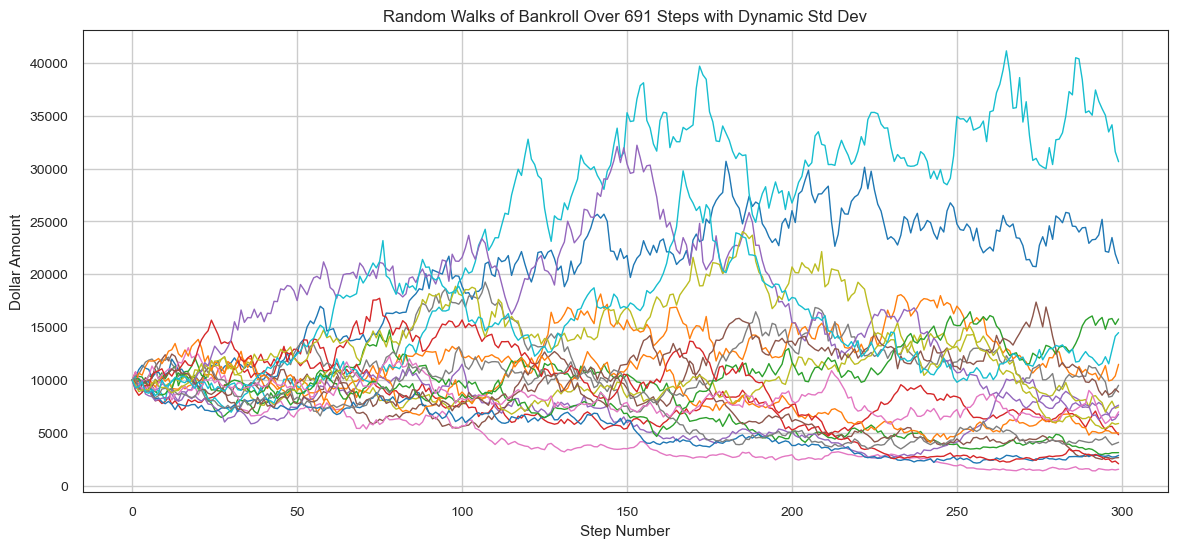

In [50]:
# Plotting the random walks
plt.figure(figsize=(14, 6))  # Set the figure size for better readability
for i in range(n_walks):
    plt.plot(range(n_steps), walks[i, :], linewidth=1)  # Plot each walk with a thin line

plt.title('Random Walks of Bankroll Over 691 Steps with Dynamic Std Dev')
plt.xlabel('Step Number')
plt.ylabel('Dollar Amount')
plt.grid(True)
plt.show()

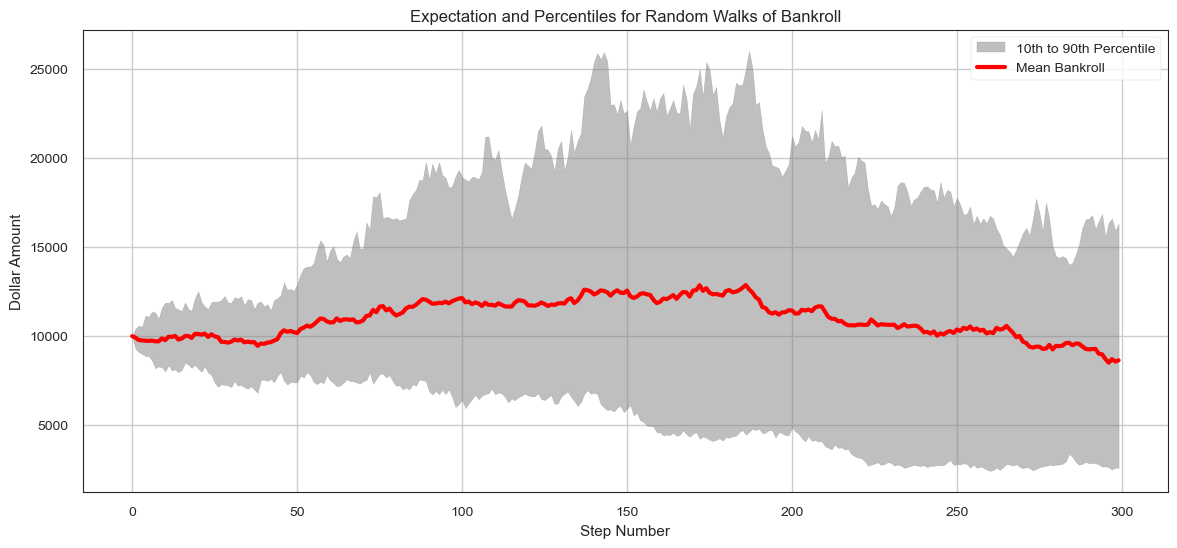

In [51]:
# Calculate mean, 10th percentile, and 90th percentile
mean_walks = np.mean(walks, axis=0)
percentile10 = np.percentile(walks, 10, axis=0)
percentile90 = np.percentile(walks, 90, axis=0)

# Plotting the mean and percentile range as a filled area
plt.figure(figsize=(14, 6))
plt.fill_between(range(n_steps), percentile10, percentile90, color='gray', alpha=0.5, label='10th to 90th Percentile')
plt.plot(mean_walks, label='Mean Bankroll', color='red', linewidth=3)

plt.title('Expectation and Percentiles for Random Walks of Bankroll')
plt.xlabel('Step Number')
plt.ylabel('Dollar Amount')
plt.legend()
plt.grid(True)
plt.show()